In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


![](https://ewscripps.brightspotcdn.com/dims4/default/42baba2/2147483647/strip/true/crop/1024x538+0+19/resize/1200x630!/quality/90/?url=https%3A%2F%2Fmediaassets.ksby.com%2Fcordillera-network%2Fwp-content%2Fuploads%2Fsites%2F2%2F2018%2F08%2F16050429%2F17424991_G.png)

Airbnb, Inc. is an American vacation rental online marketplace company based in San Francisco, California, United States. The company was founded in August 2008 by Brian Chesky (Current CEO),Joe Gebbia and Nathan Blecharczyk. Airbnb offers arrangement for lodging, primarily homestays, or tourism experiences.<br> The company was conceived after its founders rented out an air mattress in their living room, effectively turning their apartment into a bed and breakfast, to offset the high cost of rent in San Francisco. Airbnb is a shortened version of its original name, AirBedandBreakfast.com.

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor

In [3]:
# Reading the data set
airbnb = pd.read_csv('../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')

In [4]:
# Let us take a look at the dimensions of the data
airbnb.shape

(48895, 16)

So in the data set we have 48895 observations and 16 attributes. Let us now take a look at the attributes of the data set.

In [5]:
# Visualizing the top 5 rows of the data set
airbnb.head(5)

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

As we can see above, the 'last_review' attribute contains only the dates for which the airbnb property was last reviewed or the date when the last review was generated. And if there was no review generated, then there is no date and so we have a missing value in the column.

In [6]:
# Check the data types of each attribute
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Attributes such as 'id', 'host_name', and 'last_review' do not contribute much to our data analysis so we can drop these columns. 

In [7]:
# Removing the attributes which are not required for the analysis
airbnb.drop(['id','host_name','last_review'], axis = 1, inplace = True)

In [8]:
# Let us now check for missing values in the data set
airbnb.isnull().sum()

name                                 16
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
# Replacing missing values in the reviews_per_month column
airbnb.fillna({'reviews_per_month':0}, inplace = True)

# Replacing missing values in the name column
airbnb.fillna({'name':'Not Mentioned'}, inplace = True)

In [10]:
# Let us again check whether all the missing values have been removed or not
airbnb.isnull().sum()

name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

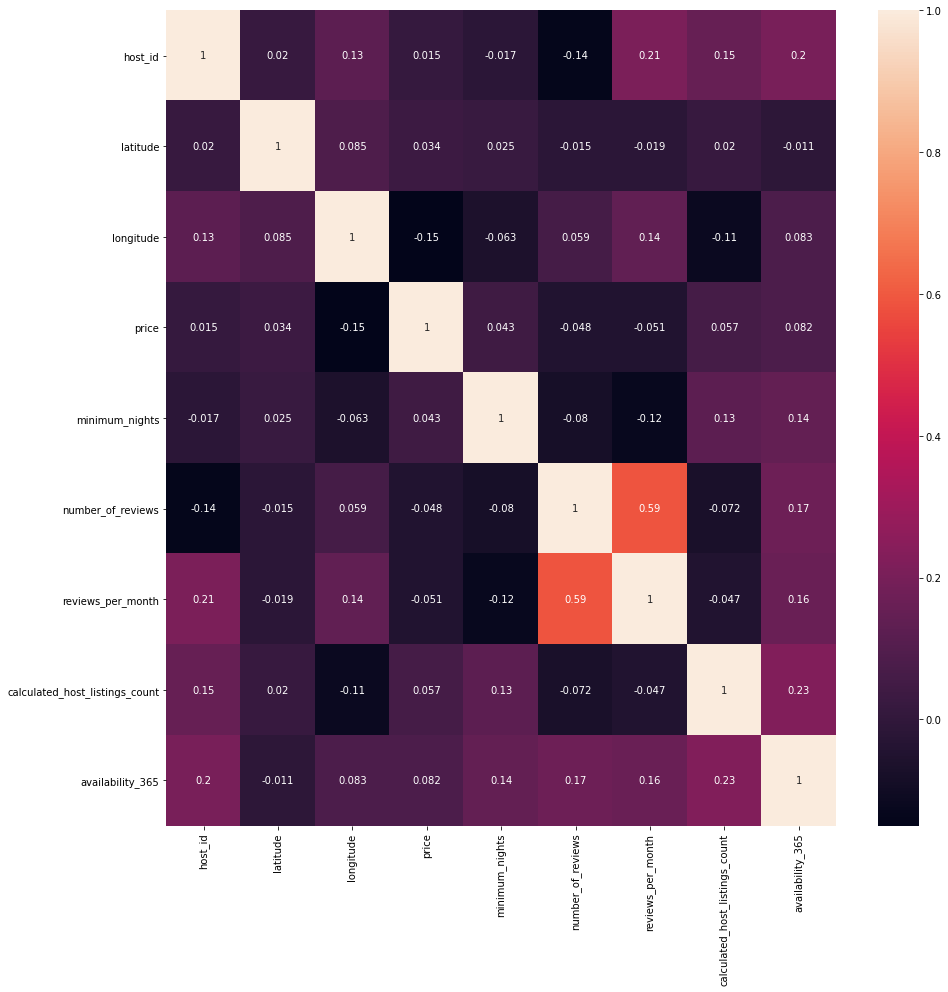

In [11]:
# Plotting the correlation matrix
plt.figure(figsize = (15,15))
sns.heatmap(airbnb.corr(), annot=True)
plt.show()

In [12]:
# Let us now take a look at the different neighborhood groups
airbnb['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

So there are only 5 neighbourhood groups in the data set.

### Count of properties available in each neighbourhood

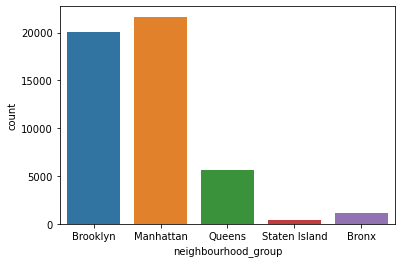

In [13]:
# Let us now take a look at how many properties are there in each neighbourhood group
sns.countplot(x = 'neighbourhood_group', data = airbnb) 

We can see here, that most of the properties fall in the Brooklyn or Manhattan neighbourhood group, while there very few properties in Bronx and Staten Island.

In [14]:
# Let us now take a look at different room types being offered at the properties
airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

There are only 3 categories for the room types, which are: Private Room- a single room, Entire home/apt: the entire house or apartment will be available for the visitors and they will be the only ones living there at that time, and Shared Room: the room can be shared with other visitors as well.

### Count of room types available in Airbnb properties

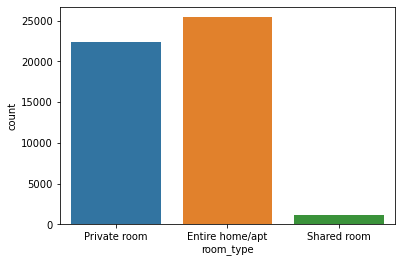

In [15]:
# Let us now look at what type of rooms do most properties offer
sns.countplot(x = 'room_type', data = airbnb) 

So most of the properties are offering either a Private room or the Entire home/apt, there are very few properties which are offering a Shared room. The reason for this can be that most of the tourists or visitors want privacy and prefer either a private room or to have the entire home/apt for themselves for their convenience. 

In [16]:
# Let us now take a look at the price range of the properties
print("--- Price Per Night ---")
print("Minimum Price in $:", min(airbnb['price']))
print("Maximum Price in $:", max(airbnb['price']))
print("Average Price in $:", airbnb['price'].mean())

--- Price Per Night ---
Minimum Price in $: 0
Maximum Price in $: 10000
Average Price in $: 152.7206871868289


In [17]:
# Let us take a look at the minimum number of nights required to be booked at the properties
airbnb['minimum_nights'].unique()

array([   1,    3,   10,   45,    2,    5,    4,   90,    7,   14,   60,
         29,   30,  180,    9,   31,    6,   15,    8,   26,   28,  200,
         50,   17,   21,   11,   25,   13,   35,   27,   18,   20,   40,
         44,   65,   55,  120,  365,  122,   19,  240,   88,  115,  150,
        370,   16,   80,  181,  265,  300,   59,  185,  360,   56,   12,
         70,   39,   24,   32, 1000,  110,  270,   22,   75,  250,   62,
         23, 1250,  364,   74,  198,  100,  500,   43,   91,  480,   53,
         99,  160,   47,  999,  186,  366,   68,   93,   87,  183,  299,
        175,   98,  133,  354,   42,   33,   37,  225,  400,  105,  184,
        153,  134,  222,   58,  210,  275,  182,  114,   85,   36])

### Min and maximum no of listings a host has on Airbnb

In [18]:
# No of listings a particular host has
print("Minimum number of listings a particular host has:", airbnb['calculated_host_listings_count'].min())
print("Maximum number of listings a particular host has:", airbnb['calculated_host_listings_count'].max())

Minimum number of listings a particular host has: 1
Maximum number of listings a particular host has: 327


In [19]:
# Let us take a look at the number of listings a host has on Airbnb
airbnb['calculated_host_listings_count'].unique()

array([  6,   2,   1,   4,   3,   5,   7,  13,  28,  11,   8,   9,  52,
        18,  15,  19,  10,  39,  26,  29,  12,  21,  96,  14,  34,  43,
       121,  37,  49,  31,  91,  16,  87,  33,  23,  50,  20,  25, 232,
        17,  47, 103,  65,  30,  27, 327,  32])

### Visualizing the percentage of listings most host have

<Figure size 2160x2160 with 0 Axes>

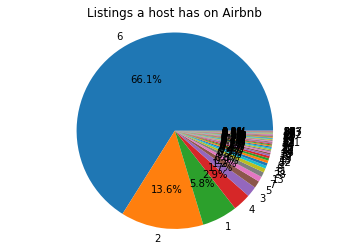

In [20]:
# Visualizing the percentage of listings most host have
labels = airbnb['calculated_host_listings_count'].unique()
sizes = airbnb['calculated_host_listings_count'].value_counts()*100

plt.figure(figsize = (30,30))
fig, ax = plt.subplots()
ax.pie(sizes, labels = labels, autopct = '%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Listings a host has on Airbnb')


plt.show()

We can see here, that majority of the hosts have 6 properties listed on Airbnb, while few have 1 or 2 properties listed. 

### Visualizing the Airbnbs in New York City on the Map

In [21]:
fig = px.scatter_mapbox(airbnb, lat = "latitude", lon = "longitude", hover_name = "neighbourhood", hover_data = ["neighbourhood_group", "price"],
                        color_discrete_sequence = ["fuchsia"], zoom = 3, height = 300)
fig.update_layout(mapbox_style = "open-street-map")
fig.update_layout(margin = {"r":0,"t":0,"l":0,"b":0})
fig.show()

### Average price of the properties based on the neighbourhood group

In [22]:
# Grouping based on neighbourhood
bronx = airbnb['neighbourhood_group'] == 'Bronx'
staten_island = airbnb['neighbourhood_group'] == 'Staten Island'
queens = airbnb['neighbourhood_group'] == 'Queens'
brooklyn = airbnb['neighbourhood_group'] == 'Brooklyn'
manhattan = airbnb['neighbourhood_group'] == 'Manhattan'

# Calculating the avergae price in each neighbourhood
bronx_avg = airbnb[bronx]['price'].mean()
statenisland_avg = airbnb[staten_island]['price'].mean()
queens_avg = airbnb[queens]['price'].mean()
brooklyn_avg = airbnb[brooklyn]['price'].mean()
manhattan_avg = airbnb[manhattan]['price'].mean()


print("--- Average Price in the Neighbourhood Group ---")
print("Bronx:",bronx_avg)
print("Staten Island:",statenisland_avg)
print("Quuens:", queens_avg)
print("Brooklyn:",brooklyn_avg)
print("Manhattan:",manhattan_avg)

--- Average Price in the Neighbourhood Group ---
Bronx: 87.4967919340055
Staten Island: 114.81233243967829
Quuens: 99.51764913519237
Brooklyn: 124.38320732192598
Manhattan: 196.8758136743456


We can see here that the neighbourhood groups Manhattan, Brooklyn and Staten Island have high values for the average price of the properties. While Bronx has the lowest value for average price. This can be because Manhattan, Brooklyn and Staten Islands are the most expensive neighbourhoods in the New York City.

### Average price of Airbnb based on the room types 

In [23]:
# Grouping based on room types
private_room = airbnb['room_type'] == 'Private room'
entire_home = airbnb['room_type'] == 'Entire home/apt'
shared_room = airbnb['room_type'] == 'Shared room'

# Calculating the avergae price in each neighbourhood
private_avg = airbnb[private_room]['price'].mean()
entire_avg = airbnb[entire_home]['price'].mean()
shared_avg = airbnb[shared_room]['price'].mean()


print("--- Average Price of the Room Types ---")
print("Private Room:",private_avg)
print("Entire Home/Apt:",entire_avg)
print("Shared room:", shared_avg)

--- Average Price of the Room Types ---
Private Room: 89.78097285675894
Entire Home/Apt: 211.79424613325986
Shared room: 70.12758620689655


We can see that the Shared rooms are the cheapest and most affordable in Airbnbs, while renting an entire apartment/home is more expensive. The price of renting a Private room is reasonable and hence is preferred by people who are travelling solo or as a couple.

### Most Expensive Airbnbs in Brooklyn

In [24]:
# Most expensive Airbnbs in Brooklyn
expensive = airbnb[airbnb['neighbourhood_group'] == 'Brooklyn'].sort_values(by = 'price', ascending = False)
expensive.head(10)

name    host_id  \
17692   Luxury 1 bedroom apt. -stunning Manhattan views    5143901   
4377                                      Film Location    1177497   
45666                              Gem of east Flatbush  262534951   
3774                   SUPER BOWL Brooklyn Duplex Apt!!   11598359   
25825                                          Fulton 2  100069033   
4345                   NearWilliamsburg bridge 11211 BK   14908606   
26739                                        Broadway 1  153497815   
4376                               Photography Location    1177497   
46614                    Northside Williamsburg Stunner     956324   
43670  Beautiful private Brooklyn room with kitchenette    8748976   

      neighbourhood_group       neighbourhood  latitude  longitude  \
17692            Brooklyn          Greenpoint  40.73260  -73.95739   
4377             Brooklyn        Clinton Hill  40.69137  -73.96723   
45666            Brooklyn       East Flatbush  40.65724  -73.92450   
3774             Brooklyn        Clinton Hill  40.68766  -73.96439   
25825            Brooklyn       Cypress Hills  40.68185  -73.88128   
4345             Brooklyn  Bedford-Stuyvesant  40.69572  -73.95731   
26739            Brooklyn  Bedford-Stuyvesant  40.68742  -73.91957   
4376             Brooklyn        Clinton Hill  40.69127  -73.96563   
46614            Brooklyn        Williamsburg  40.71705  -73.96470   
43670            Brooklyn  Bedford-Stuyvesant  40.68807  -73.95426   

             room_type  price  minimum_nights  number_of_reviews  \
17692  Entire home/apt  10000               5                  5   
4377   Entire home/apt   8000               1                  1   
45666     Private room   7500               1                  8   
3774   Entire home/apt   6500               1                  0   
25825  Entire home/apt   5000               2                  4   
4345      Private room   5000               6                 10   
26739  Entire home/apt   5000               2                  8   
4376   Entire home/apt   4500               1                  5   
46614  Entire home/apt   4500              30                  0   
43670     Private room   4200             114                  0   

       reviews_per_month  calculated_host_listings_count  availability_365  
17692               0.16                               1                 0  
4377                0.03                              11               365  
45666               6.15                               2               179  
3774                0.00                               1                 0  
25825               0.18                               1                 0  
4345                0.16                               1               363  
26739               0.38                               1                 0  
4376                0.09                              11               365  
46614               0.00                               1               365  
43670               0.00                               1               347

### Visualizing the most used words in the names of Airbnbs in Brooklyn

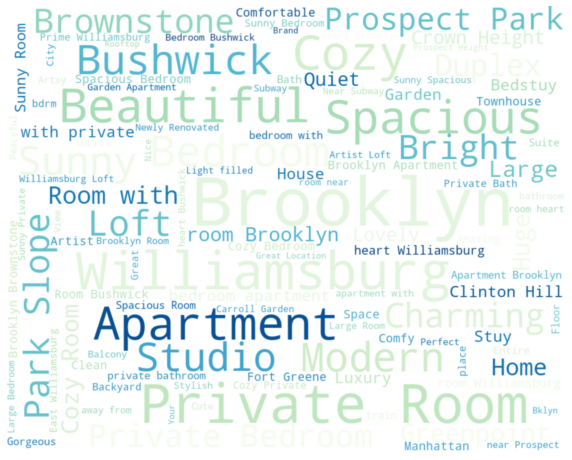

In [25]:
# Visualizing the most used words in the names of the most expensive Airbnbs in Brooklyn
airbnb_brooklyn = airbnb[airbnb['neighbourhood_group'] == 'Brooklyn']
word_cloud = WordCloud(width = 1000,
                       height = 800,
                       colormap = 'GnBu', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, min_font_size = 15,  
                       background_color = "white").generate(" ".join(airbnb_brooklyn['name']))

plt.figure(figsize = (10, 15))
plt.imshow(word_cloud, interpolation = "gaussian")
plt.axis("off")
plt.show()

We can see here that the expensive Airbnbs in Brooklyn use the words such as 'Charming', 'Cozy', 'Studio', 'Modern', 'Beautiful', and'Luxury' in the names.

### Most Expensive Airbnbs in Manhattan

In [26]:
expensive2 = airbnb[airbnb['neighbourhood_group'] == 'Manhattan'].sort_values(by = 'price', ascending = False)
expensive2.head(10)

name    host_id  \
29238                                1-BR Lincoln Center   72390391   
12342                Quiet, Clean, Lit @ LES & Chinatown    3906464   
40433  2br - The Heart of NYC: Manhattans Lower East ...    4382127   
6530                                  Spanish Harlem Apt    1235070   
30268  Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho   18128455   
29662          East 72nd Townhouse by (Hidden by Airbnb)  156158778   
42523                70' Luxury MotorYacht on the Hudson    7407743   
44034                   3000 sq ft daylight photo studio    3750764   
48043       Luxury TriBeCa Apartment at an amazing price  271248669   
37194               Apartment New York \nHell’s Kitchens   35303743   

      neighbourhood_group      neighbourhood  latitude  longitude  \
29238           Manhattan    Upper West Side  40.77213  -73.98665   
12342           Manhattan    Lower East Side  40.71355  -73.98507   
40433           Manhattan    Lower East Side  40.71980  -73.98566   
6530            Manhattan        East Harlem  40.79264  -73.93898   
30268           Manhattan            Tribeca  40.72197  -74.00633   
29662           Manhattan    Upper East Side  40.76824  -73.95989   
42523           Manhattan  Battery Park City  40.71162  -74.01693   
44034           Manhattan            Chelsea  40.75060  -74.00388   
48043           Manhattan            Tribeca  40.71206  -74.00999   
37194           Manhattan    Upper West Side  40.76835  -73.98367   

             room_type  price  minimum_nights  number_of_reviews  \
29238  Entire home/apt  10000              30                  0   
12342     Private room   9999              99                  6   
40433  Entire home/apt   9999              30                  0   
6530   Entire home/apt   9999               5                  1   
30268  Entire home/apt   8500              30                  2   
29662  Entire home/apt   7703               1                  0   
42523  Entire home/apt   7500               1                  0   
44034  Entire home/apt   6800               1                  0   
48043  Entire home/apt   6500             180                  0   
37194     Private room   6500              30                  0   

       reviews_per_month  calculated_host_listings_count  availability_365  
29238               0.00                               1                83  
12342               0.14                               1                83  
40433               0.00                               1               365  
6530                0.02                               1                 0  
30268               0.18                               1               251  
29662               0.00                              12               146  
42523               0.00                               1               364  
44034               0.00                               6               364  
48043               0.00                               1               365  
37194               0.00                               1                97

### Visualizing the most used words in the names of Airbnbs in Manhattan

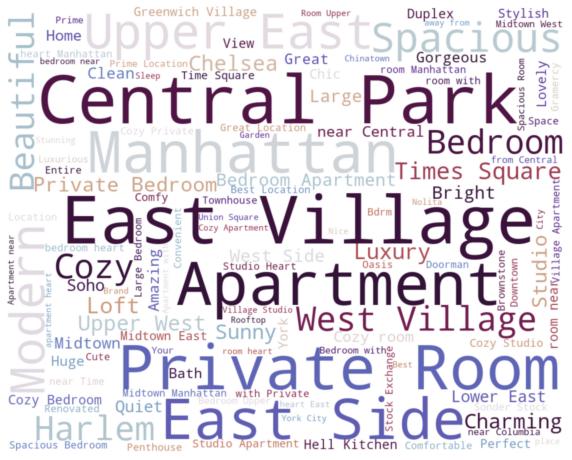

In [27]:
# Visualizing the most used words in the names of the most expensive Airbnbs in Manhattan
airbnb_manhattan = airbnb[airbnb['neighbourhood_group'] == 'Manhattan']
word_cloud = WordCloud(width = 1000,
                       height = 800,
                       colormap = 'twilight_shifted', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, min_font_size = 15,  
                       background_color = "white").generate(" ".join(airbnb_manhattan['name']))

plt.figure(figsize = (10, 15))
plt.imshow(word_cloud, interpolation = "gaussian")
plt.axis("off")
plt.show()

We can see here that most of the Airbnbs in Manhattan use 'Central Park' in their name as Manhattan is only at a 5 minute walking distance from Central Park, which is the fifth largest park in the city by area covering 843 acres. Central Park has turtles, fish, squirrels and chipmunk among its permanent residents and home to more than 230 different species of birds. The park ranks as a symbol of New York City after Statue of Liberty and Empire State Building. Hence, most of the Airbnbs mention the name of the park in the name of their listing as it is considered to be a great landmark.

### Airbnbs Having most number of Reviews

In [28]:
most_reviews = airbnb.sort_values(by = 'number_of_reviews', ascending = False)
most_reviews.head(10)

name   host_id  \
11759                            Room near JFK Queen Bed  47621202   
2031                          Great Bedroom in Manhattan   4734398   
2030                      Beautiful Bedroom in Manhattan   4734398   
2015                        Private Bedroom in Manhattan   4734398   
13495                            Room Near JFK Twin Beds  47621202   
10623                  Steps away from Laguardia airport  37312959   
1879            Manhattan Lux Loft.Like.Love.Lots.Look !   2369681   
20403  Cozy Room Family Home LGA Airport NO CLEANING FEE  26432133   
4870                  Private brownstone studio Brooklyn  12949460   
471                      LG Private Room/Family Friendly    792159   

      neighbourhood_group    neighbourhood  latitude  longitude  \
11759              Queens          Jamaica  40.66730  -73.76831   
2031            Manhattan           Harlem  40.82085  -73.94025   
2030            Manhattan           Harlem  40.82124  -73.93838   
2015            Manhattan           Harlem  40.82264  -73.94041   
13495              Queens          Jamaica  40.66939  -73.76975   
10623              Queens    East Elmhurst  40.77006  -73.87683   
1879            Manhattan  Lower East Side  40.71921  -73.99116   
20403              Queens    East Elmhurst  40.76335  -73.87007   
4870             Brooklyn       Park Slope  40.67926  -73.97711   
471              Brooklyn         Bushwick  40.70283  -73.92131   

             room_type  price  minimum_nights  number_of_reviews  \
11759     Private room     47               1                629   
2031      Private room     49               1                607   
2030      Private room     49               1                597   
2015      Private room     49               1                594   
13495     Private room     47               1                576   
10623     Private room     46               1                543   
1879      Private room     99               2                540   
20403     Private room     48               1                510   
4870   Entire home/apt    160               1                488   
471       Private room     60               3                480   

       reviews_per_month  calculated_host_listings_count  availability_365  
11759              14.58                               2               333  
2031                7.75                               3               293  
2030                7.72                               3               342  
2015                7.57                               3               339  
13495              13.40                               2               173  
10623              11.59                               5               163  
1879                6.95                               1               179  
20403              16.22                               5               341  
4870                8.14                               1               269  
471                 6.70                               1                 0

### Cheapest Airbnbs in New York City 

In [29]:
cheapest = airbnb.sort_values(by = 'price', ascending = True)
cheapest.head(10)

name    host_id  \
25796       Cozy yet spacious private brownstone bedroom   86327101   
25634    MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)   15787004   
25433      ★Hostel Style Room | Ideal Traveling Buddies★  131697576   
25753                    Sunny, Quiet Room in Greenpoint    1641537   
23161  Huge Brooklyn Brownstone Living, Close to it all.    8993084   
25795  Contemporary bedroom in brownstone with nice view   86327101   
26841  Coliving in Brooklyn! Modern design / Shared room  101970559   
25778      Modern apartment in the heart of Williamsburg   10132166   
25794  Spacious comfortable master bedroom with nice ...   86327101   
26866             Best Coliving space ever! Shared room.  101970559   

      neighbourhood_group       neighbourhood  latitude  longitude  \
25796            Brooklyn  Bedford-Stuyvesant  40.68258  -73.91284   
25634            Brooklyn            Bushwick  40.69467  -73.92433   
25433               Bronx     East Morrisania  40.83296  -73.88668   
25753            Brooklyn          Greenpoint  40.72462  -73.94072   
23161            Brooklyn  Bedford-Stuyvesant  40.69023  -73.95428   
25795            Brooklyn  Bedford-Stuyvesant  40.68279  -73.91170   
26841            Brooklyn            Bushwick  40.69211  -73.90670   
25778            Brooklyn        Williamsburg  40.70838  -73.94645   
25794            Brooklyn  Bedford-Stuyvesant  40.68173  -73.91342   
26866            Brooklyn            Bushwick  40.69166  -73.90928   

             room_type  price  minimum_nights  number_of_reviews  \
25796     Private room      0               1                 95   
25634     Private room      0               2                 16   
25433     Private room      0               2                 55   
25753     Private room      0               2                 12   
23161     Private room      0               4                  1   
25795     Private room      0               1                 95   
26841      Shared room      0              30                  2   
25778  Entire home/apt      0               5                  3   
25794     Private room      0               1                 93   
26866      Shared room      0              30                  5   

       reviews_per_month  calculated_host_listings_count  availability_365  
25796               4.35                               6               222  
25634               0.71                               5                 0  
25433               2.56                               4               127  
25753               0.53                               2                 0  
23161               0.05                               4                28  
25795               4.37                               6               232  
26841               0.11                               6               333  
25778               0.15                               1                73  
25794               4.28                               6               176  
26866               0.26                               6               139

### Most Expensive Airbnbs in New York City

In [30]:
luxury = airbnb.sort_values(by = 'price', ascending = False)
luxury.head(10)

name    host_id  \
9151                 Furnished room in Astoria apartment   20582832   
17692    Luxury 1 bedroom apt. -stunning Manhattan views    5143901   
29238                                1-BR Lincoln Center   72390391   
40433  2br - The Heart of NYC: Manhattans Lower East ...    4382127   
12342                Quiet, Clean, Lit @ LES & Chinatown    3906464   
6530                                  Spanish Harlem Apt    1235070   
30268  Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho   18128455   
4377                                       Film Location    1177497   
29662          East 72nd Townhouse by (Hidden by Airbnb)  156158778   
42523                70' Luxury MotorYacht on the Hudson    7407743   

      neighbourhood_group      neighbourhood  latitude  longitude  \
9151               Queens            Astoria  40.76810  -73.91651   
17692            Brooklyn         Greenpoint  40.73260  -73.95739   
29238           Manhattan    Upper West Side  40.77213  -73.98665   
40433           Manhattan    Lower East Side  40.71980  -73.98566   
12342           Manhattan    Lower East Side  40.71355  -73.98507   
6530            Manhattan        East Harlem  40.79264  -73.93898   
30268           Manhattan            Tribeca  40.72197  -74.00633   
4377             Brooklyn       Clinton Hill  40.69137  -73.96723   
29662           Manhattan    Upper East Side  40.76824  -73.95989   
42523           Manhattan  Battery Park City  40.71162  -74.01693   

             room_type  price  minimum_nights  number_of_reviews  \
9151      Private room  10000             100                  2   
17692  Entire home/apt  10000               5                  5   
29238  Entire home/apt  10000              30                  0   
40433  Entire home/apt   9999              30                  0   
12342     Private room   9999              99                  6   
6530   Entire home/apt   9999               5                  1   
30268  Entire home/apt   8500              30                  2   
4377   Entire home/apt   8000               1                  1   
29662  Entire home/apt   7703               1                  0   
42523  Entire home/apt   7500               1                  0   

       reviews_per_month  calculated_host_listings_count  availability_365  
9151                0.04                               1                 0  
17692               0.16                               1                 0  
29238               0.00                               1                83  
40433               0.00                               1               365  
12342               0.14                               1                83  
6530                0.02                               1                 0  
30268               0.18                               1               251  
4377                0.03                              11               365  
29662               0.00                              12               146  
42523               0.00                               1               364

### Visualizing the most used words in the names of the cheapest Airbnbs in New York City

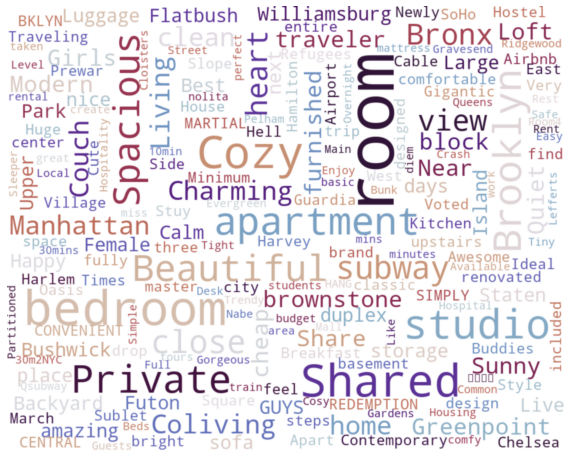

In [31]:
# Storing the names of the 100 cheapest airbnbs in New York in a separate variable

cheapest = cheapest.head(100)

# Visualizing the most used words in the names of the cheapest Airbnbs in New York City
word_cloud = WordCloud(width = 1000,
                       height = 800,
                       colormap = 'twilight_shifted', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, min_font_size = 15,  
                       background_color = "white").generate(" ".join(cheapest['name']))

plt.figure(figsize = (10, 15))
plt.imshow(word_cloud, interpolation = "gaussian")
plt.axis("off")
plt.show()

### Visualizing the most used words in the names of the most expensive Airbnbs in New York City

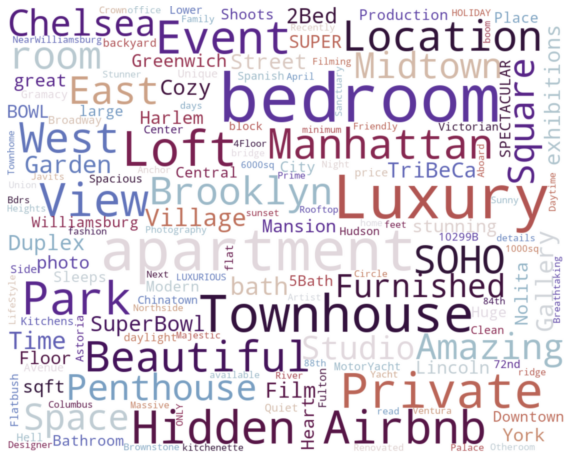

In [32]:
# Storing the names of the 100 luxurious airbnbs in New York in a separate variable
luxury = luxury.head(100)

# Visualizing the most used words in the names of the cheapest Airbnbs in New York City
word_cloud = WordCloud(width = 1000,
                       height = 800,
                       colormap = 'twilight_shifted', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, min_font_size = 15,  
                       background_color = "white").generate(" ".join(luxury['name']))

plt.figure(figsize = (10, 15))
plt.imshow(word_cloud, interpolation = "gaussian")
plt.axis("off")
plt.show()

Comparing the words used in the names of the cheapest and most expensive Airbnbs in New York, we can see that the cheapest Airbnbs use words like'Subway', 'Studio', 'Room', 'Beautiful', 'Cozy', 'Spacious', 'Shared' and 'Cheap' while the expensive Airbnbs use words like 'Townhouse', 'Luxury', 'Location', 'Hidden', 'Park', 'SOHO' and 'Penthouse'. <br>
People who choose cheap Airbnbs generally look for properties which are spacious, cosy, cheap and near to the subway station as it reduces the transport cost and brings down the overall cost of their trip while people who prefer luxurious Airbnbs opt them because of privacy (peaceful and secluded from crowded places), comfort and location (close to famous landmarks such as 'Central Park').

### Feature Engineering

In [33]:
# Selecting features for building the model
feature_columns = ['neighbourhood_group','room_type','price','minimum_nights', 'number_of_reviews',
                   'calculated_host_listings_count','availability_365']

In [34]:
# Visualizing the selected features
model_features = airbnb[feature_columns]
model_features.head(5)

neighbourhood_group        room_type  price  minimum_nights  \
0            Brooklyn     Private room    149               1   
1           Manhattan  Entire home/apt    225               1   
2           Manhattan     Private room    150               3   
3            Brooklyn  Entire home/apt     89               1   
4           Manhattan  Entire home/apt     80              10   

   number_of_reviews  calculated_host_listings_count  availability_365  
0                  9                               6               365  
1                 45                               2               355  
2                  0                               1               365  
3                270                               1               194  
4                  9                               1                 0

In [35]:
# Separatign numerical and categorical features
numerical_features = model_features.dtypes[model_features.dtypes!="object"].index

print("Number of numerical features",len(numerical_features))
print(numerical_features)

#Pulling out names of categorical variables by conditioning dtypes
#Equal to object type

categorical_features = model_features.dtypes[model_features.dtypes=="object"].index
print("Number of categorical features",len(categorical_features))
print(categorical_features)

Number of numerical features 5
Index(['price', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')
Number of categorical features 2
Index(['neighbourhood_group', 'room_type'], dtype='object')


In [36]:
# Generating dummies for the categorical variables and concatenating them
neighbourhood_dummies = pd.get_dummies(model_features['neighbourhood_group'], drop_first = True)
room_dummies = pd.get_dummies(model_features['room_type'], drop_first = True)
all_data = pd.concat([model_features, neighbourhood_dummies, room_dummies ], axis = 1)
all_data.head(3)

neighbourhood_group        room_type  price  minimum_nights  \
0            Brooklyn     Private room    149               1   
1           Manhattan  Entire home/apt    225               1   
2           Manhattan     Private room    150               3   

   number_of_reviews  calculated_host_listings_count  availability_365  \
0                  9                               6               365   
1                 45                               2               355   
2                  0                               1               365   

   Brooklyn  Manhattan  Queens  Staten Island  Private room  Shared room  
0         1          0       0              0             1            0  
1         0          1       0              0             0            0  
2         0          1       0              0             1            0

In [37]:
# Removing the variables for which dummy values have been generated
all_data.drop('neighbourhood_group', axis = 1, inplace = True)
all_data.drop('room_type', axis = 1, inplace = True)
all_data.head(3)

price  minimum_nights  number_of_reviews  calculated_host_listings_count  \
0    149               1                  9                               6   
1    225               1                 45                               2   
2    150               3                  0                               1   

   availability_365  Brooklyn  Manhattan  Queens  Staten Island  Private room  \
0               365         1          0       0              0             1   
1               355         0          1       0              0             0   
2               365         0          1       0              0             1   

   Shared room  
0            0  
1            0  
2            0

### Building the prediction model

In [38]:
# Splitting the data into train and test
y = all_data['price']
x = all_data.drop(['price'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 200)

In [39]:
# Building a linear regression model
lin_model = LinearRegression()
lin_model.fit(x_train,y_train)

# Making the predictions
y_pred = (lin_model.predict(x_test))